In [165]:
import requests
from cascid.configs import pad_ufes_cnf as pad_ufes
from cascid.configs import config
from cascid.datasets.pad_ufes import database
import base64
import matplotlib.pyplot as plt
import cv2


In [166]:
df = database.get_df()
df


patient_id  lesion_id  smoke  drink background_father background_mother  \
0      PAT_1516       1765    NaN    NaN               NaN               NaN   
1        PAT_46        881  False  False         POMERANIA         POMERANIA   
2      PAT_1545       1867    NaN    NaN               NaN               NaN   
3      PAT_1989       4061    NaN    NaN               NaN               NaN   
4       PAT_684       1302  False   True         POMERANIA         POMERANIA   
...         ...        ...    ...    ...               ...               ...   
2293   PAT_1708       3156    NaN    NaN               NaN               NaN   
2294     PAT_46        880  False  False         POMERANIA         POMERANIA   
2295   PAT_1343       1217    NaN    NaN               NaN               NaN   
2296    PAT_326        690  False  False         POMERANIA         POMERANIA   
2297   PAT_1714       3189    NaN    NaN               NaN               NaN   

      age pesticide  gender skin_cancer_history  ... diameter_2 diagnostic  \
0       8       NaN     NaN                 NaN  ...        NaN        NEV   
1      55     False  FEMALE                True  ...        5.0        BCC   
2      77       NaN     NaN                 NaN  ...        NaN        ACK   
3      75       NaN     NaN                 NaN  ...        NaN        ACK   
4      79     False    MALE                True  ...        5.0        BCC   
...   ...       ...     ...                 ...  ...        ...        ...   
2293   73       NaN     NaN                 NaN  ...        NaN        ACK   
2294   55     False  FEMALE                True  ...       12.0        BCC   
2295   74       NaN     NaN                 NaN  ...        NaN        SEK   
2296   58      True  FEMALE                True  ...        4.0        BCC   
2297   41       NaN     NaN                 NaN  ...        NaN        SEK   

       itch   grew   hurt  changed  bleed elevation                 img_id  \
0     False  False  False    False  False     False  PAT_1516_1765_530.png   
1      True   True  False     True   True      True     PAT_46_881_939.png   
2      True  False  False    False  False     False  PAT_1545_1867_547.png   
3      True  False  False    False  False     False  PAT_1989_4061_934.png   
4      True   True  False    False   True      True   PAT_684_1302_588.png   
...     ...    ...    ...      ...    ...       ...                    ...   
2293   True  False  False    False  False     False  PAT_1708_3156_175.png   
2294   True   True  False     True  False     False     PAT_46_880_140.png   
2295  False  False  False    False  False     False  PAT_1343_1217_404.png   
2296   True  False  False    False  False      True    PAT_326_690_823.png   
2297  False   True  False    False  False      True  PAT_1714_3189_989.png   

     biopsed  
0      False  
1       True  
2      False  
3      False  
4       True  
...      ...  
2293   False  
2294    True  
2295   False  
2296    True  
2297   False  

[2298 rows x 26 columns]

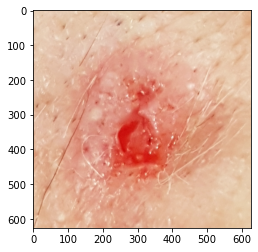

b'iVBORw0KGgoAAAANSUhEUgAAAnIAAAJyCAYAAABALi2VAACAAElEQVR42oS953NdSZLlmf/kfFlbMWZjazv9Ydu6baerekp0VWdWZVYqimQmtYKhABJaa601CJAgCS0fNEGCZFZW9c7OxsTx8OPX7wWy50PYfQoPwHv3RvziuPvxT46WesPxy76A49HznnCw0CXjcLFbBh47ic9hHL/oSWOxKxwtdIbDZx1pzLWHo/mOcDDfLvf5/P5cq4zDubb4fJu8Bq/dn2kLe1MtoTTdKvf5GO4fzLbZY3g9xhv8XfHx7fHGsDvZLM8dP+uU5/BzB9NplCZbwt5Ec9gdb7KxPdoQdsYa5Taew5Dfgb9zPv6dc53hZLEnHD3rkvsnz7rleDDTHkpT8e+cbJWxj98RH8PYn21P/+tshwx7XF+D98TgY6X4N8rPzMXXz3fKwG17PL5XKf5N/N/3p1plHMzG40xLHE3xs2mU4+FcS/zb488txPfFz82nn9/HZ/wsfW/8DvF/vX05EL+zXhnvXg2Gn7Ymwo8bY+HNUvw/n8XPcb41nM7Fz3SqXsbxTGM4mm6Q2zgeTNaF0niNjIOJ2nAY7x9O1sbbNWFv9GnYHqoIuyNPwz6ex3N4n9nGcPa8Lfy4OhD+bXM8nL3ojt9hV3j7ojM+3iG/T37PVHzvsSp5j52B8rDZ80DGRtedsNZxK2x33Q27PffDbv/DsDfwKGz13JPB+wcDj0Op72HYja/H2OnW0XdPxm58TWmoPOz0Pw57g+VyG8ftvkfye3DcHSgL2/F9dgbLwt5wfM1IRdjH/yOjSsbhWE04Gq+VgdvH+Hzi/7oz/CT+/dUy8P/jiMd2BirC3hCOT8Ja1+Ow3h3/9r7ysDtYKY/zWBp+Gj/DKhn4fI+mm2Tsx+/6NH6/56/i97cUz9F5nAvxO4rjKH7/J/E5jAOcD1Px3I7fBcde/G5KM/XxvGqwcfQs/ux8UzznGnOP787Uydieij83Wx

In [167]:
sample_image = str(pad_ufes.IMAGES_DIR / df.sample(1)["img_id"].iloc[0])
img = cv2.imread(sample_image)[:,:,::-1]
plt.imshow(img)
plt.show()
with open(sample_image, "rb") as imbytes:
    b = imbytes.read()
    imb = str(b)
    b64 = base64.b64encode(b)
print(b64)

In [182]:
type(b64)

bytes

In [168]:
img_recovered = base64.b64decode(b64) 
img_recovered

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02r\x00\x00\x02r\x08\x06\x00\x00\x00@.-\x95\x00\x00\x80\x00IDATx\xda\x84\xbd\xe7s]I\x92\xe5\x99\xff\xe4|Y[1fck;\xfda\xdb\xbam\xa7\xabzJtUgVeV*\x8ad&\xb5\x82\xa1\x00\x12Zk\xad5\x08\x90 \t-\x1f4A\x82dVV\xf5\xce\xce\xc6\xc4\xf1\xf0\xe3\xd7\xef\x05\xb2\xe7C\xd8}\n\x0f\xc0{\xf7F\xfc\xe2\xb8\xfb\xf1O\x8e\x96z\xc3\xf1\xcb\xbe\x80\xe3\xd1\xf3\x9ep\xb0\xd0%\xe3p\xb1[\x06\x1e;\x89\xcfa\x1c\xbf\xe8Ic\xb1+\x1c-t\x86\xc3g\x1di\xcc\xb5\x87\xa3\xf9\x8ep0\xdf.\xf7\xf9\xfc\xfe\\\xab\x8c\xc3\xb9\xb6\xf8|\x9b\xbc\x06\xaf\xdd\x9fi\x0b{S-\xa14\xdd*\xf7\xf9\x18\xee\x1f\xcc\xb6\xd9cx=\xc6\x1b\xfc]\xf1\xf1\xed\xf1\xc6\xb0;\xd9,\xcf\x1d?\xeb\x94\xe7\xf0s\x07\xd3i\x94&[\xc2\xdeDs\xd8\x1do\xb2\xb1=\xda\x10v\xc6\x1a\xe56\x9e\xc3\x90\xdf\x81\xbfs>\xfe\x9ds\x9d\xe1d\xb1\'\x1c=\xeb\x92\xfb\'\xcf\xba\xe5x0\xd3\x1eJS\xf1\xef\x9cl\x95\xb1\x8f\xdf\x11\x1f\xc3\xd8\x9fmO\xff\xebl\x87\x0c{\\_\x83\xf7\xc4\xe0c\xa5\xf87\xca\xcf\xcc\xc5\xd7\xcfw\xca\xc0m{<\xbeW)\xfeM\xfc\xdf\xf7\

In [169]:
imb

'b\'\\x89PNG\\r\\n\\x1a\\n\\x00\\x00\\x00\\rIHDR\\x00\\x00\\x02r\\x00\\x00\\x02r\\x08\\x06\\x00\\x00\\x00@.-\\x95\\x00\\x00\\x80\\x00IDATx\\xda\\x84\\xbd\\xe7s]I\\x92\\xe5\\x99\\xff\\xe4|Y[1fck;\\xfda\\xdb\\xbam\\xa7\\xabzJtUgVeV*\\x8ad&\\xb5\\x82\\xa1\\x00\\x12Zk\\xad5\\x08\\x90 \\t-\\x1f4A\\x82dVV\\xf5\\xce\\xce\\xc6\\xc4\\xf1\\xf0\\xe3\\xd7\\xef\\x05\\xb2\\xe7C\\xd8}\\n\\x0f\\xc0{\\xf7F\\xfc\\xe2\\xb8\\xfb\\xf1O\\x8e\\x96z\\xc3\\xf1\\xcb\\xbe\\x80\\xe3\\xd1\\xf3\\x9ep\\xb0\\xd0%\\xe3p\\xb1[\\x06\\x1e;\\x89\\xcfa\\x1c\\xbf\\xe8Ic\\xb1+\\x1c-t\\x86\\xc3g\\x1di\\xcc\\xb5\\x87\\xa3\\xf9\\x8ep0\\xdf.\\xf7\\xf9\\xfc\\xfe\\\\\\xab\\x8c\\xc3\\xb9\\xb6\\xf8|\\x9b\\xbc\\x06\\xaf\\xdd\\x9fi\\x0b{S-\\xa14\\xdd*\\xf7\\xf9\\x18\\xee\\x1f\\xcc\\xb6\\xd9cx=\\xc6\\x1b\\xfc]\\xf1\\xf1\\xed\\xf1\\xc6\\xb0;\\xd9,\\xcf\\x1d?\\xeb\\x94\\xe7\\xf0s\\x07\\xd3i\\x94&[\\xc2\\xdeDs\\xd8\\x1do\\xb2\\xb1=\\xda\\x10v\\xc6\\x1a\\xe56\\x9e\\xc3\\x90\\xdf\\x81\\xbfs>\\xfe\\x9ds\\x9d\\xe1d\\xb1\\\'\\x1c=\\xeb\\x92\\x

In [184]:
data={"image_to_base64": b64}
type(str(b64))

str

In [199]:
import json

class BytesEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, bytes):
            return obj.decode('utf-8')
        return json.JSONEncoder.default(self, obj)

d = {'image_to_base64': str(b64, encoding="utf-8")}
j = json.dumps(d, cls=BytesEncoder)

resp = requests.post("http://localhost:8000/upload", data=j, headers={'Content-Type': 'application/json'})

In [200]:
resp

<Response [200]>

In [201]:
import json
# path = json.loads(resp.content)["path"]
# print(path)
resp2 = requests.get("http://localhost:8000/images/img")

In [198]:
resp2

<Response [404]>

In [114]:
resp2.content

b'{"detail":"File not found, check your request path"}'

In [80]:
json.loads(resp2.content)

{'detail': 'File not found, check your request path'}